In [2]:
import os
import re
import sys
import numpy as np
import periodictable as pt
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import DBSCAN
from sklearn import decomposition
import seaborn as sns
import sklearn.datasets as data

import hdbscan
import umap.umap_ as umap

%matplotlib inline

sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}



/home/lachlan/.pyenv/versions/3.7.13/envs/venv_readoutxfm/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


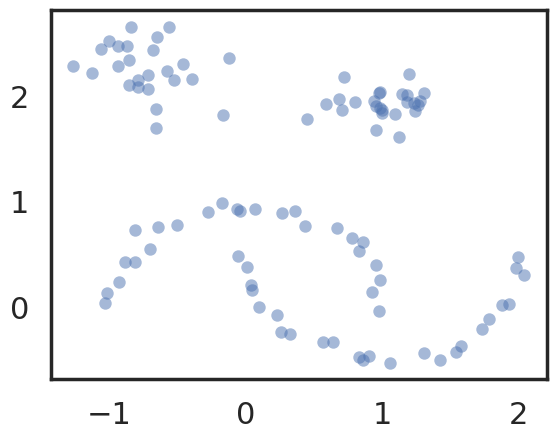

In [3]:
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [4]:
test_data.shape

(100, 2)

In [3]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

<AxesSubplot:>

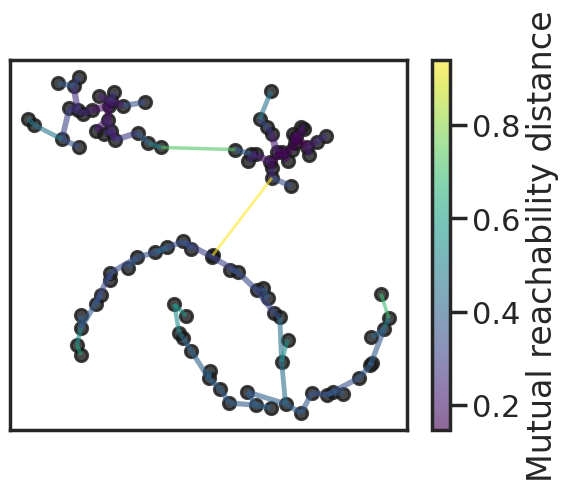

In [7]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<AxesSubplot:ylabel='distance'>

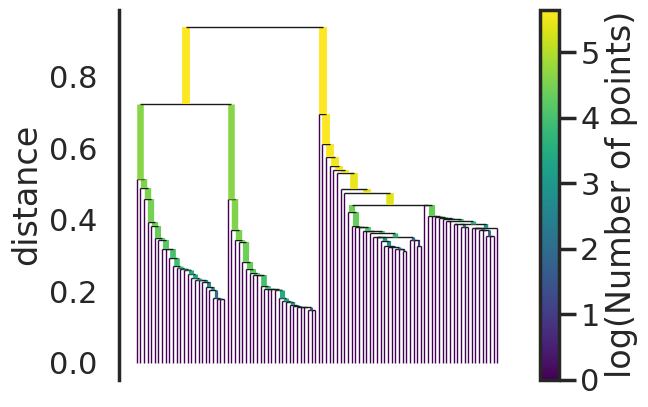

In [8]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

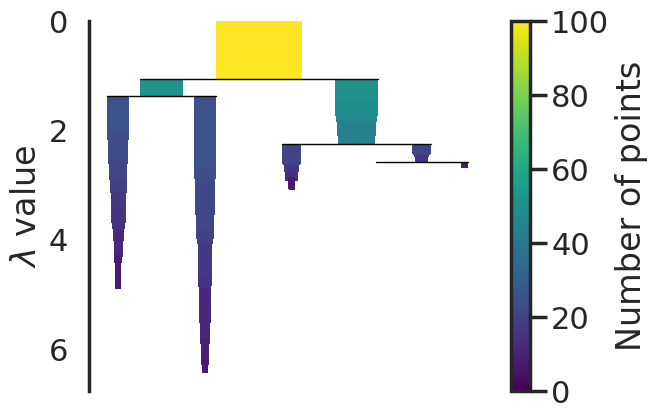

In [9]:
clusterer.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

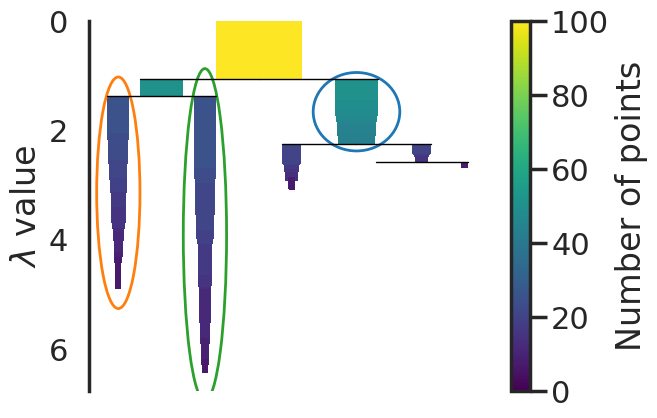

In [10]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

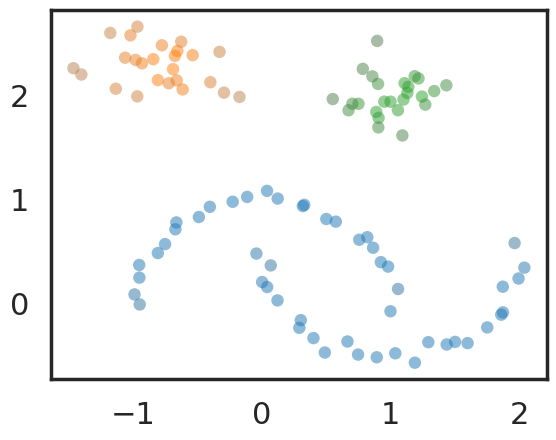

In [11]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)


In [23]:
print(test_data.T)
print(test_data.shape)

[[-0.80565576  0.40241098  1.50165008 -0.9462628  -0.66203282  1.05900926
   0.31971625  0.29255038 -0.40193312  1.99436652  0.7485324  -0.66946392
   0.30425356  1.85978596  0.92522681  0.66631324  1.18966054  0.7577137
   0.12444844  2.03938361 -0.22471761  1.87179407  0.89372204  0.98170656
   0.50217915  1.96373166  0.04309408  0.07080026 -0.98667618  1.75134984
   0.82012944  0.86535118 -0.94885632 -0.04055329  0.33067195  0.49063776
   0.00399551  1.03770024  1.5988601  -0.74956047  1.43633104  1.87349093
  -0.95032044 -0.11217881  0.04222039  1.29401047 -0.48712516  0.57578604
   1.00010772  0.12320397 -0.5353239  -0.7743733   0.90588201  0.85977676
   1.00068385  1.09249664  1.13877667 -0.96415173 -0.29214818 -0.67317818
  -0.17175838 -1.17472881  1.10077296 -0.32720164  1.21749623 -0.7205255
  -0.92892451 -1.13192145 -1.46073825 -0.80527068  1.27027221 -0.97867891
   0.55221415 -0.96540117 -0.65395655  0.70404757  0.8966931  -0.61276524
   0.90366984 -0.84131699  0.75200188  0